In [165]:
#Importing all the required libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from sklearn.metrics import confusion_matrix,accuracy_score


from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU

In [166]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [168]:
# Returns statistics on numeric values of columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [169]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [170]:
#  Returns total unique values in each column
for data in df.columns[:]:
    print(data,":",len(df[data].unique()),"labels")

RowNumber : 10000 labels
CustomerId : 10000 labels
Surname : 2932 labels
CreditScore : 460 labels
Geography : 3 labels
Gender : 2 labels
Age : 70 labels
Tenure : 11 labels
Balance : 6382 labels
NumOfProducts : 4 labels
HasCrCard : 2 labels
IsActiveMember : 2 labels
EstimatedSalary : 9999 labels
Exited : 2 labels


In [171]:
print(df['Geography'].unique())
print(df['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [172]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [173]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

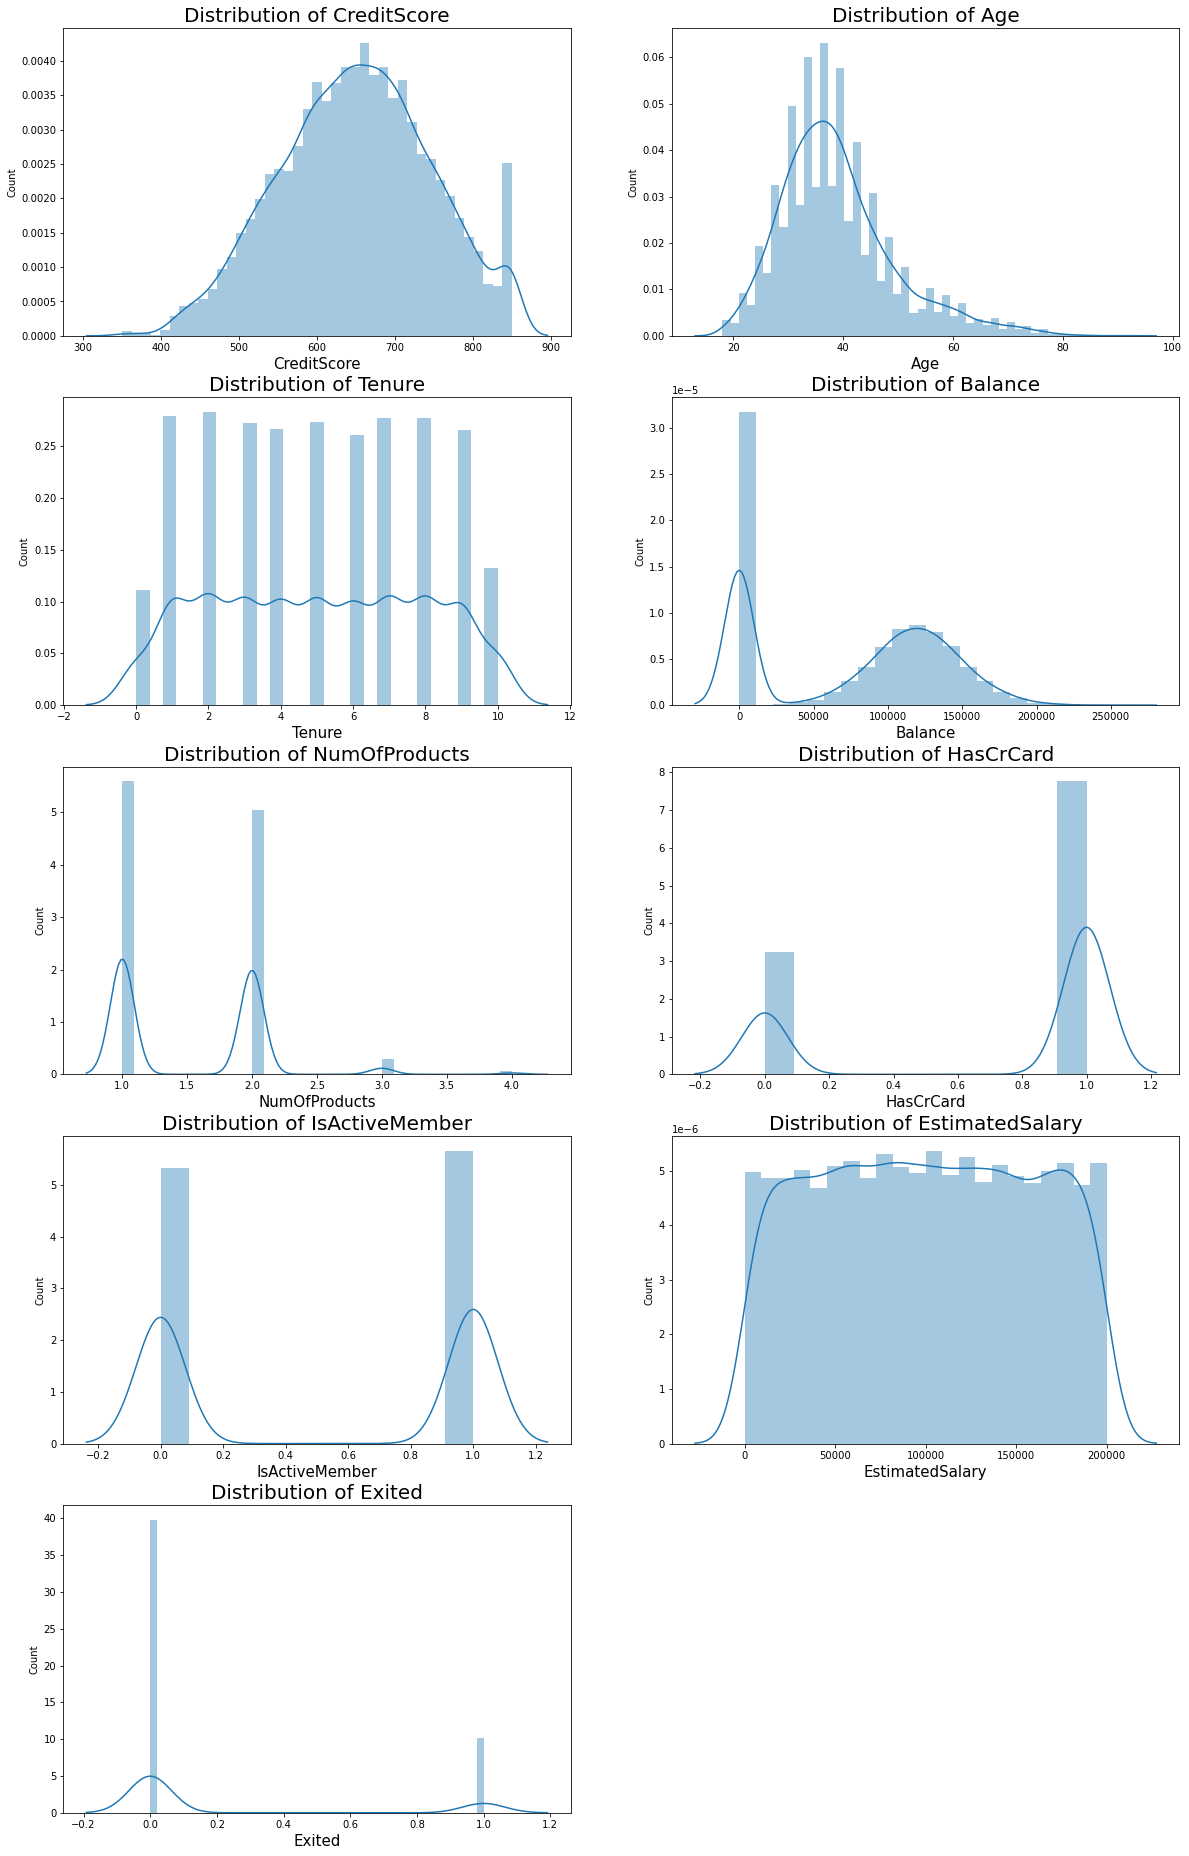

In [174]:
# Visualizing the feature by using matplotlib hist function

columns = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary','Exited']
nrows=len(columns)
ncolumns=2
subCnt=1
plt.figure(figsize=(20,60))

for column in columns:
    plt.subplot(nrows,ncolumns,subCnt)
    sns.distplot(df[column])
    plt.title("Distribution of "+column, fontsize=20)
    plt.xlabel(column, fontsize=15)
    plt.ylabel('Count')
    subCnt = subCnt + 1

plt.show()

In [175]:
def count(feature1,  dataset):
    plt.figure(figsize=(10,6))
    ax = sns.countplot(y = feature1, data = df)
    plt.title('Count Plot of ' + feature1, fontsize = 15)
    plt.xlabel('Count', fontsize = 15)
    plt.ylabel(feature1 , fontsize = 15)
    
    total = len(df[feature1])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100*p.get_width()/total)
        x = p.get_x() + p.get_width() + 25
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y) ,fontsize = 12)
plt.show()

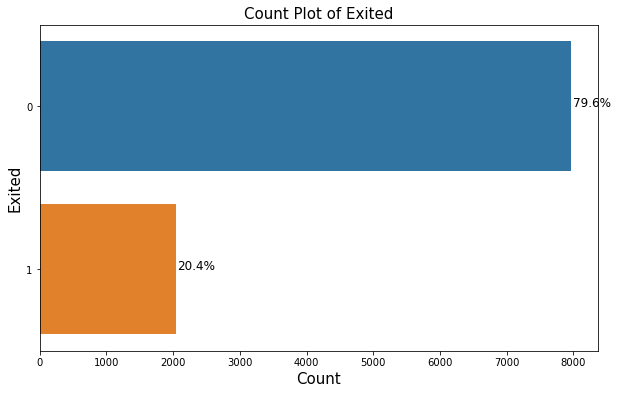

In [176]:
count('Exited',  df)

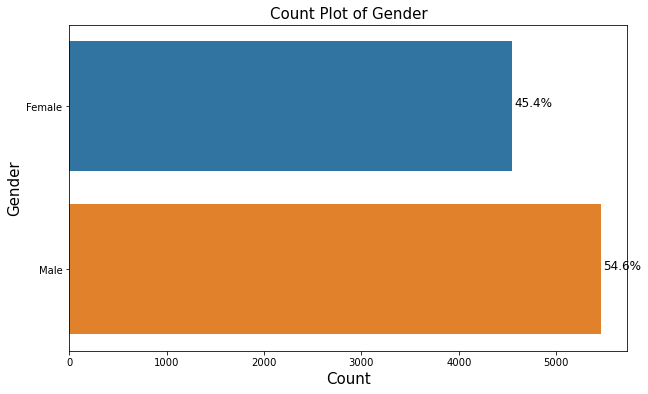

In [177]:
count('Gender',  df)

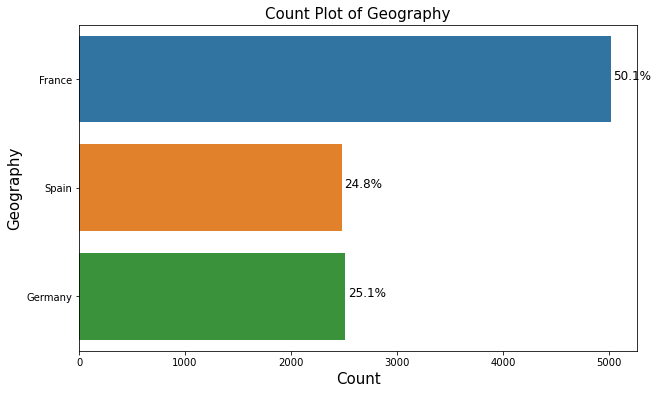

In [178]:
count('Geography',  df)

In [179]:
def count_with_dependentvar(feature1, feature2,  dataset):
    plt.figure(figsize=(12,6))
    ax = sns.countplot(y = feature1, hue = feature2, data = df)
    plt.title('Count Plot of ' + feature1 +'with'+ feature2 , fontsize = 15)
    plt.xlabel('Count', fontsize = 15)
    plt.ylabel(feature1 , fontsize = 15)
    
    total = len(df[feature1])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100*p.get_width()/total)
        x = p.get_x() + p.get_width() + 25
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y) ,fontsize = 12)
plt.show()

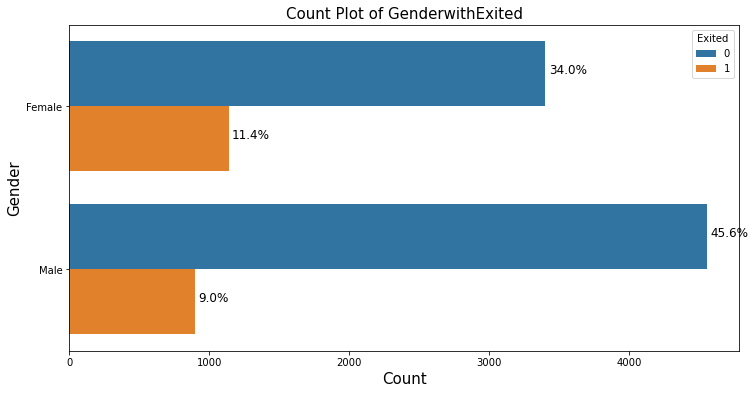

In [180]:
count_with_dependentvar('Gender', 'Exited',  df)

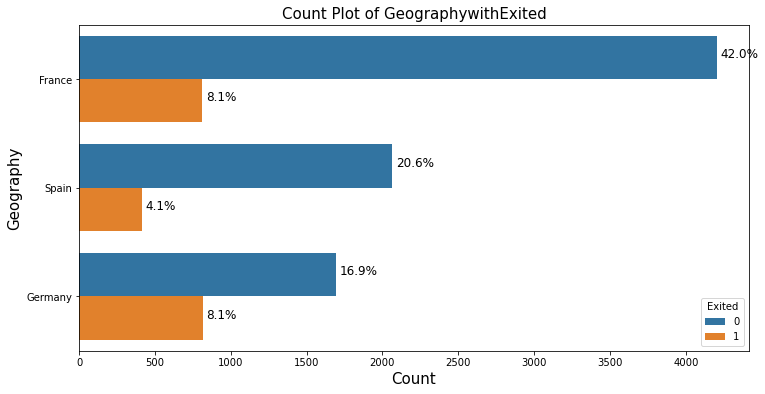

In [181]:
count_with_dependentvar('Geography', 'Exited',  df)

# Feature Engineering

In [182]:
# Converting 'Geography' and 'Gender' column
geography = pd.get_dummies(df['Geography'], drop_first=True)
gender = pd.get_dummies(df['Gender'], drop_first=True)

In [183]:

# Appending columns to original dataframe
df = pd.concat([df, geography, gender], axis=1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [184]:
df.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [185]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


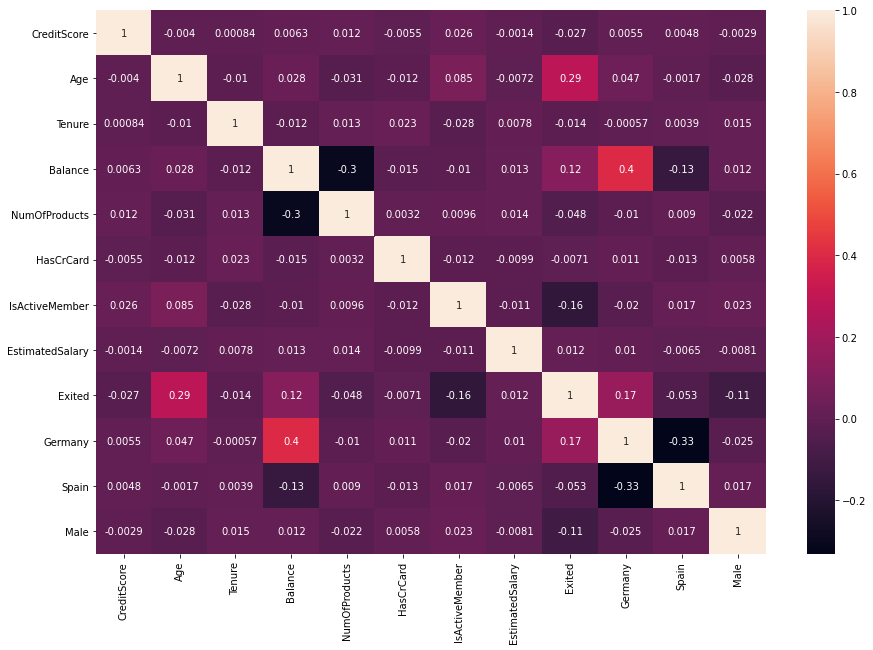

In [186]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr() ,  annot = True)
plt.show()

# Data Preprocessing

• Split the dataset into X and y (i.e independent features ,dependent features).

In [1]:
X = df.drop('Exited' , axis = 1)
y = df['Exited']
y=np.array(y)

NameError: name 'df' is not defined

• Split the dataset into train and test sets.

In [188]:
# Splitting the dataset into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (8000, 11), X_test size: (2000, 11)


In [189]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0


• Apply feature scaling to train and test dataset.

In [190]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building Artificial Neural Network (ANN)

In [241]:
# Initialising the ANN
model = Sequential()

In [242]:
# Adding the input layer and the first hidden layer
model.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 11))

In [243]:
# Adding the second hidden layer
model.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation= 'relu'))

In [244]:
# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [245]:
# Compiling the ANN
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [246]:
model.summary()

Model: "sequential_330"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_967 (Dense)            (None, 6)                 72        
_________________________________________________________________
dense_968 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_969 (Dense)            (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [247]:
# Fitting the ANN to the Training set
model_history = model.fit(X_train, y_train, batch_size = 10, validation_split = 0.33, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.7715 - accuracy: 0.5648 - val_loss: 0.5312 - val_accuracy: 0.7970
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5003 - accuracy: 0.7975 - val_loss: 0.4754 - val_accuracy: 0.7989
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4536 - accuracy: 0.8067 - val_loss: 0.4421 - val_accuracy: 0.8122
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4239 - accuracy: 0.8196 - val_loss: 0.4254 - val_accuracy: 0.8145
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4075 - accuracy: 0.8285 - val_loss: 0.4167 - val_accuracy: 0.8198
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3965 - accuracy: 0.8315 - val_loss: 0.4068 - val_accuracy: 0.8239
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3876 - accuracy: 0.8373 - val_loss: 0.3991 - val_accuracy: 0.8254

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3301 - accuracy: 0.8630 - val_loss: 0.3568 - val_accuracy: 0.8565
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3301 - accuracy: 0.8643 - val_loss: 0.3559 - val_accuracy: 0.8561
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3296 - accuracy: 0.8636 - val_loss: 0.3573 - val_accuracy: 0.8557
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3290 - accuracy: 0.8649 - val_loss: 0.3567 - val_accuracy: 0.8554
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3293 - accuracy: 0.8642 - val_loss: 0.3564 - val_accuracy: 0.8557
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3293 - accuracy: 0.8636 - val_loss: 0.3552 - val_accuracy: 0.8557
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3294 - accuracy: 0.8634 - val_loss: 0.3565 - val_accuracy:

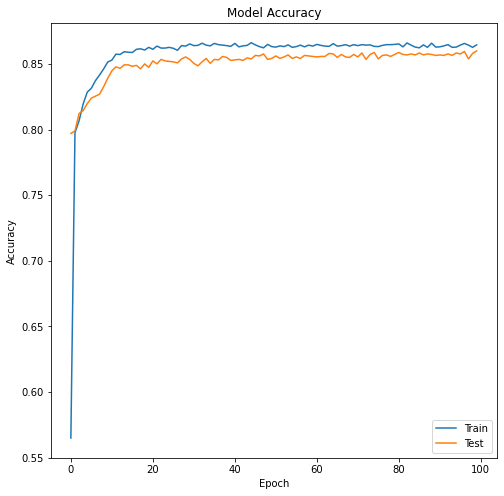

In [248]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

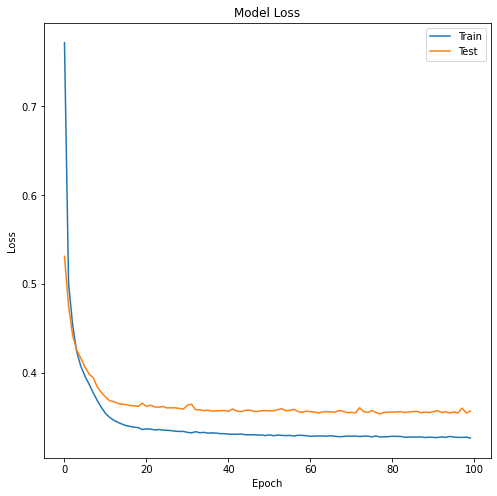

In [249]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Model Evaluation

In [250]:
# Predicting the Test set
y_pred = model.predict(X_test)
y_pred

array([[0.2384825 ],
       [0.4427218 ],
       [0.18253455],
       ...,
       [0.192556  ],
       [0.13093674],
       [0.23305067]], dtype=float32)

In [251]:
cm = confusion_matrix(y_test,  y_pred.round())
cm

array([[1511,   84],
       [ 189,  216]], dtype=int64)

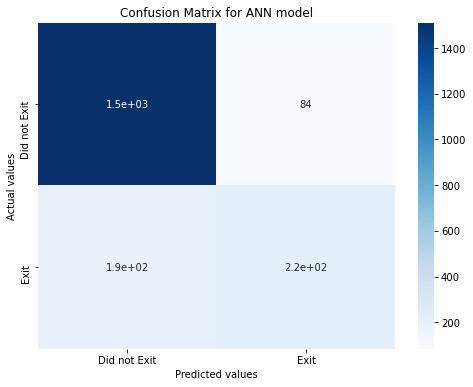

In [252]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, xticklabels=['Did not Exit', 'Exit'], yticklabels=['Did not Exit', 'Exit'], cmap='Blues')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [253]:
# Calculate the Accuracy
score = accuracy_score(y_test,y_pred.round())
print('The accuracy score for ANN model is: {}%'.format(score))

The accuracy score for ANN model is: 0.8635%


# Using Hyperparameter Tuning

In [254]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    


In [255]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [256]:
layers = [(50), (50,20), (50,30,15), (70,45,15,5)]
nn_param_grid = {
    'layers':layers,
        'epochs': [30],     
        'batch_size':[128, 256],        
        'activation': ['sigmoid', 'relu'],
    }

In [257]:
grid = GridSearchCV(estimator=model, param_grid=nn_param_grid,cv=5)

In [258]:
grid_result = grid.fit(X_train, y_train)

In [259]:
[grid_result.best_score_,grid_result.best_params_]

[0.8565000057220459,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 30,
  'layers': (50, 30, 15)}]

In [266]:
y_pred_hp = grid.predict(X_test)
y_pred_hp

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [267]:
cm = confusion_matrix(y_test,  y_pred_hp.round())
cm

array([[1542,   53],
       [ 220,  185]], dtype=int64)

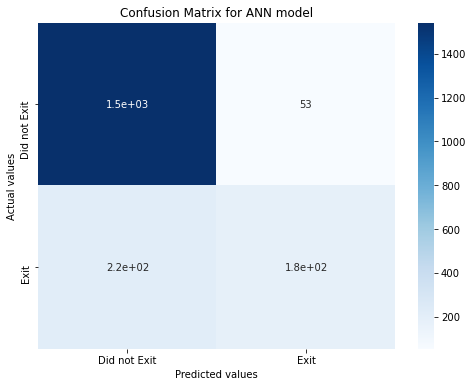

In [264]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, xticklabels=['Did not Exit', 'Exit'], yticklabels=['Did not Exit', 'Exit'], cmap='Blues')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [269]:
# Calculate the Accuracy
score = accuracy_score(y_test,y_pred_hp.round())
print('The accuracy score for ANN model using hyperparameter tuning is: {}%'.format(score))

The accuracy score for ANN model using hyperparameter tuning is: 0.8635%


# Predictions

In [279]:
# Prediction with the model
def predict(value):
  
  # Convert list to numpy array
    sample_value = np.array(value)

  # Reshape because sample_value contains only 1 record
    sample_value = sample_value.reshape(1, -1)

  # Feature Scaling
    sample_value = sc.transform(sample_value)

    return grid.predict(sample_value)

In [280]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [608,41,1,83807.86,1,0,1,112542.58,0,1,0]
if predict(sample_value)>0.5:
    print('Prediction: High change of exit!')
else:
    print('Prediction: Low change of exit.')

Prediction: Low change of exit.


In [281]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [805, 45, 9, 116585.97, 1, 1, 0, 189428.75, 1, 0, 0]
if predict(sample_value)>0.5:
    print('Prediction: High change of exit!')
else:
    print('Prediction: Low change of exit.')

Prediction: High change of exit!
